### Social_Network_Ads - Decision Tree Classification

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Floresta Aleatória
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#Reading the Data set
dataset = pd.read_csv('Social_Network_Ads.csv')

In [8]:
# Independant variables and Dependant Variables
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4:5].values

In [9]:
# Trainning Set and the Test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.25, random_state = 0)


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Xtrain = sc_X.fit_transform(Xtrain)
Xtest =   sc_X.transform(Xtest)


In [11]:
# Fitting the Random Forest Classifier to the trainning set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier( n_estimators = 4, criterion = 'entropy', random_state = 0)
classifier.fit(Xtrain, Ytrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
# Predicting the test set result
Ypred = classifier.predict(Xtest)

In [13]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, Ypred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


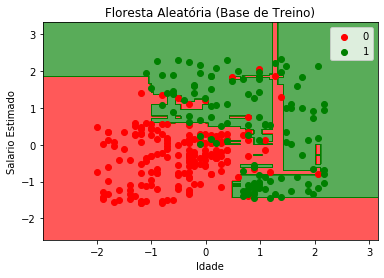

In [14]:
#  Visualing the Trainning set results
from matplotlib.colors import ListedColormap
Xset, Yset = Xtrain[:, [0, 1]], Ytrain[:, 0]
X1, X2 = np.meshgrid( np.arange( start = Xset[:, 0].min() - 1, stop = Xset[:, 0].max() + 1, step = 0.01), 
                      np.arange( start = Xset[:, 1].min() - 1, stop = Xset[:, 1].max() + 1, step = 0.01))
plt.contourf( X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.65, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Yset)):
    plt.scatter(Xset[Yset == j, 0], Xset[Yset == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Floresta Aleatória (Base de Treino)')
plt.xlabel('Idade')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


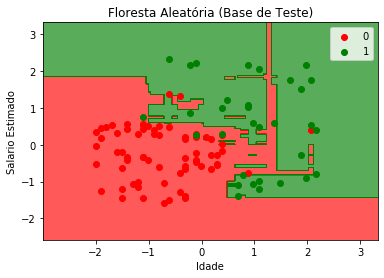

In [15]:
# Visualising the teste set results
from matplotlib.colors import ListedColormap
Xset, Yset = Xtest[:, [0, 1]], Ytest[:, 0]
X1, X2 = np.meshgrid( np.arange( start = Xset[:, 0].min() - 1, stop = Xset[:, 1].max() + 1, step = 0.01), 
                      np.arange( start = Xset[:, 1].min() - 1, stop = Xset[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.65, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Yset)):
    plt.scatter(Xset[Yset == j, 0], Xset[Yset == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Floresta Aleatória (Base de Teste)')
plt.xlabel('Idade')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()
